In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, accuracy_score
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [24]:
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
df = pd.read_csv('imputed_original.csv')
target_col = 're.admission.within.6.months'

X = df.drop(columns=[target_col])
y = df[target_col]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

In [26]:
smote = SMOTE(random_state=RANDOM_STATE)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [27]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [28]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
cv_scores = cross_val_score(rf_model, X_train_smote, y_train_smote, cv=kfold, scoring='f1')
print(f"Mean CV F1 score: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

Mean CV F1 score: 0.6992 (±0.0296)


In [29]:
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [30]:
y_pred = rf_model.predict(X_test)

Accuracy: 0.5995
Precision: 0.4762
Recall: 0.3871
F1 Score: 0.4270


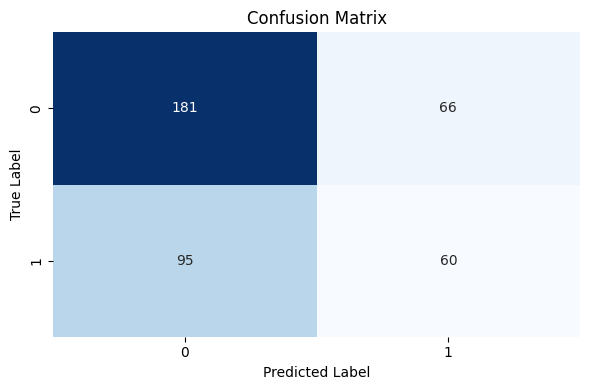

In [31]:
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred)
}

# Print metrics in a clean format
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Confusion matrix (simplified visualization)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

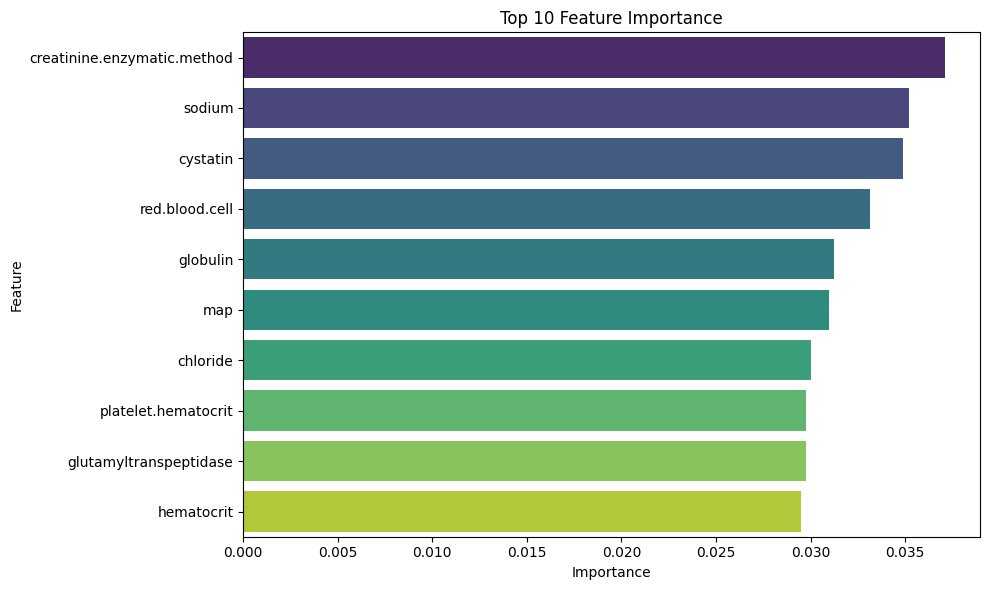

In [32]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot top 10 features only
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')
plt.title('Top 10 Feature Importance')
plt.tight_layout()
plt.show()

In [33]:
paper_f1_score = 0.4672
current_f1 = metrics["F1 Score"]
print(f"Paper F1: {paper_f1_score:.4f} | Our F1: {current_f1:.4f} | Diff: {current_f1 - paper_f1_score:.4f}")

Paper F1: 0.4672 | Our F1: 0.4270 | Diff: -0.0402
